In [6]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make('MountainCar-v0')

/opt/conda/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [109]:
while True:
    env.reset()
    for i in range(200):
        a = 0 #0 if i < 45 else 2
        _, _, t, _ = env.step(0)
        env.render()
        if t:
            break

KeyboardInterrupt: 

In [31]:
for x in np.arange(-0.8,-0.7,1):
    observation = env.reset()
    env.env.state = np.array([x, 0])
    for t in range(300):
        env.render()
        action = 2#0 if t==0 else 2 #2 #0 if not tree1.get(observation) and tree.get(observation) else 2
        #print(action, end='')
        observation, reward, done, info = env.step(action)
        #print(reward)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

Episode finished after 200 timesteps


In [69]:
lxar = []
lyar = []
#nresar = []
observation = env.reset()
env.env.state = np.array([0.499, 0])
for t in range(300):
    #env.render()
    action = 0#0 if t==0 else 2 #2 #0 if not tree1.get(observation) and tree.get(observation) else 2
    #print(action, end='')
    observation, reward, done, info = env.step(action)
    #print(reward)
    lxar.append(observation[0])
    lyar.append(observation[1])
    if observation[0]==-1.2:
        print("Episode finished after {} timesteps".format(t+1))
        break

Episode finished after 43 timesteps


In [117]:
np.arange(-1.2,-0.7,0.05)

array([-1.2, -1.1, -1. , -0.9, -0.8])

In [19]:
env.action_space

Discrete(3)

In [58]:
env.env.state

array([-0.59436429,  0.        ])

In [44]:
class SearchLeaf:
    def __init__(self, works):
        self.works = works
    
    def get(self, inp):
        return self.works

class SearchNode:
    def __init__(self, dim, threshold):
        self.dim = dim
        self.threshold = threshold
        
    def get(self, inp):
        child = self.left if inp[self.dim] < self.threshold else self.right
        return child.get(inp)

def allequal(*args):
    for a in args[1:]:
        if args[0] != a:
            return False
    return True

xar = []
yar = []
resar = []

action = 2
def probe1(x,y):
    env.reset()
    env.env.state = np.array([x, y])
    for t in range(333):
        #env.render()
        #print(observation, action)
        observation, reward, done, info = env.step(action)
        #print(done)
        if done:
            xar.append(x)
            yar.append(y)
            resar.append(t < 198)
            return t < 198
    print("Error: left loop")
    
action = 0
def probe2(x,y):
    if tree1.get([x,y]):
        xar.append(x)
        yar.append(y)
        resar.append(True)
        return True
    newx = x-(x + 0.85)*0.001
    env.reset()
    env.env.state = np.array([newx, y])
    for t in range(333):
        #env.render()
        #print(observation, action)
        observation, reward, done, info = env.step(action)
        #print(done)
        if tree1.get(observation) or done:
            xar.append(x)
            yar.append(y)
            resar.append(not done)
            return not done
    print("Error: left loop")
    
def probecrash(x,y):
    observation = env.reset()
    env.env.state = np.array([x, y])
    first = 200
    for t in range(333):
        #env.render()
        #print(observation, action)
        observation, reward, done, info = env.step(2)
        #print(done)
        if done:
            first = t
            break
    env.env.state = np.array([x, y])
    ac = 0
    for t in range(333):
        #env.render()
        #print(observation, action)
        if observation[1] == 0:
            ac = 2
        observation, reward, done, info = env.step(ac)
        #print(done)
        if done:
            return t <= first            
    print("Error: left loop")
    
def compare(x,y):
    if x<y:
        return 0#, x, y
    if x>y:
        return 2
    return 1
    
def probeol(x,y):
    observation = env.reset()
    env.env.state = np.array([x, y])
    first = 200
    for t in range(333):
        #env.render()
        #print(observation, action)
        observation, reward, done, info = env.step(2)
        #print(done)
        if done:
            first = t
            break
    observation = env.reset()
    env.env.state = np.array([x, y])
    for t in range(333):
        #env.render()
        #print(observation, action)
        observation, reward, done, info = env.step(0 if t==0 else 2)
        #print(done)
        if done:
            return compare(t, first)       
    print("Error: left loop")
    
def probe(x,y):
    res = probeol(x,y)
    xar.append(x)
    yar.append(y)
    resar.append(res)
    return res

trueLeaf = SearchLeaf(True)
falseLeaf = SearchLeaf(False)

def getLeaf(b):
    return trueLeaf if b else falseLeaf

minlevel = 5
#left and bot = smaller!!!
def deepen(minx, maxx, miny, maxy, tl, tr, bl, br, level):
    if level >= 8:
        return falseLeaf
    midx = (minx+maxx)/2
    midy = (miny+maxy)/2
    top = probe(midx, maxy)
    bot = probe(midx, miny)
    left = probe(minx, midy)
    right = probe(maxx, midy)
    middle = probe(midx, midy)
    #print(midx, midy, top, bot, left, right, middle)
    c1 = deepen(minx, midx, midy, maxy, tl, top, left, middle, level+1) if not allequal(tl, top, left, middle) or level < minlevel else getLeaf(left)
    c2 = deepen(midx, maxx, midy, maxy, top, tr, middle, right, level+1) if not allequal(top, tr, middle, right) or level < minlevel else getLeaf(right)
    c3 = deepen(minx, midx, miny, midy, left, middle, bl, bot, level+1) if not allequal(left, middle, bl, bot) or level < minlevel else getLeaf(left)
    c4 = deepen(midx, maxx, miny, midy, middle, right, bot, br, level+1) if not allequal(middle, right, bot, br) or level < minlevel else getLeaf(right)
    if allequal(left, tl, top, tr, right, middle) and not level < minlevel:
        #split vertically first
        node = SearchNode(1, midy)
        node.right = c1
        node.left = SearchNode(0, midx)
        node.left.left = c3
        node.left.right = c4
    elif allequal(left, bl, bot, br, right, middle) and not level < minlevel:
        node = SearchNode(1, midy)
        node.left = c3
        node.right = SearchNode(0, midx)
        node.right.left = c1
        node.right.right = c2
    else:
        node = SearchNode(0, midx)
        if allequal(left, tl, top, bl, bot, middle):
            node.left = c1
        else:
            node.left = SearchNode(1, midy)
            node.left.left = c3
            node.left.right = c1
        if allequal(right, tr, top, br, bot, middle):
            node.right = c2
        else:
            node.right = SearchNode(1, midy)
            node.right.left = c4
            node.right.right = c2
    return node

In [138]:
(probe(env.min_position, -env.max_speed),
probe(env.min_position, env.max_speed),
probe(env.max_position, -env.max_speed),
probe(env.max_position, env.max_speed))

(True, False, True, True)

In [156]:
(probe(env.min_position, -env.max_speed),
probe(env.min_position, env.max_speed),
probe(-0.6, -env.max_speed),
probe(-0.6, env.max_speed))

(True, True, False, True)

In [41]:
tree = deepen(env.min_position, env.max_position, -env.max_speed, env.max_speed, True, True, True, True, 0)

In [86]:
tree = deepen(env.min_position, env.max_position, -env.max_speed, env.max_speed, False, False, False, False, 0)

In [157]:
tree = deepen(env.min_position, -0.6, -env.max_speed, env.max_speed, True, True, False, True, 0)

In [39]:
tree.get([0,0])

False

In [37]:
probeol(-0.8,0)

1

In [145]:
xar1 = xar
yar1 = yar
resar1 = resar
tree1 = tree

In [62]:
xar = []
yar = []
resar = []
xmin = -1.2
xmax = .6
ymin = -.07
ymax = .07
'''
xmin = -1.
xmax = -.8
ymin = -.05
ymax = .01

xmin = -0.9
xmax = .4 #8
ymin = -.07
ymax = -.03

xmin = -.91
xmax = -.89
ymin = -.034
ymax = -.028

xmin = -.86
xmax = -.845
ymin = -.003
ymax = .001
'''
steps = 200
cnt = 0
for x in np.arange(xmin,xmax,(xmax-xmin)/steps):
    cnt = cnt + 1
    if cnt % 2 == 0:
        print('|' if cnt%20 == 0 else '-', end='')
    for y in np.arange(ymin,ymax,(ymax-ymin)/steps):
        probe(x,y)

---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|

In [168]:
def lb(x):
    return -5.3723677772462161e-002*x**3 + \
     2.5811274414176525e-002*x**2 + \
     4.6409933494908004e-003*x \
    -3.7587946909594432e-002

In [171]:
def lb(x):
    return -5.1940869699659810e-002 + \
     8.1017984046726985e-003*x + \
    -7.0166419278662767e-002*x**2 + \
    -9.2250030678963438e-002*x**3

In [167]:
-5.3723677772462161e-002

-0.05372367777246216

In [143]:
mx = np.arange(-1.2,0.6,0.01)

In [161]:
def lb2(x):
    return -0.06*(1-(1.25*(x+.4))**2)**.5#+0.05

In [172]:
#%matplotlib
fig, ax = plt.subplots(figsize=(27,29))
ax.scatter(xar, yar, c=resar, marker=',')
ax.plot(nxar,nyar,c='r',lw=4)
ax.plot(lxar,lyar,c='r',lw=4)
ax.plot(mx,lb(mx),c='r',lw=4)

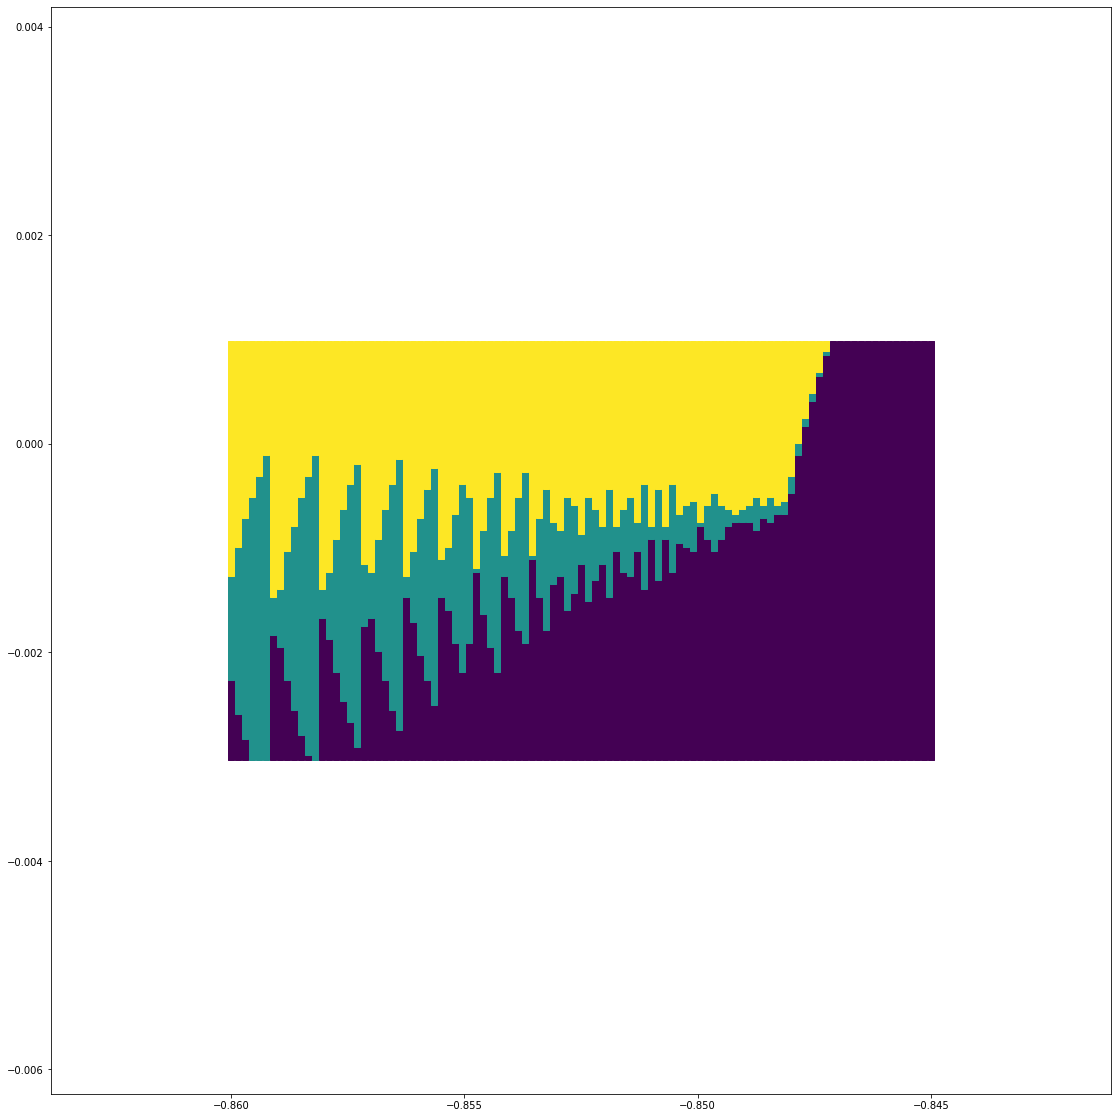

In [27]:
fig, ax = plt.subplots(figsize=(19,20))
ax.scatter(xar, yar, c=resar, marker=',')

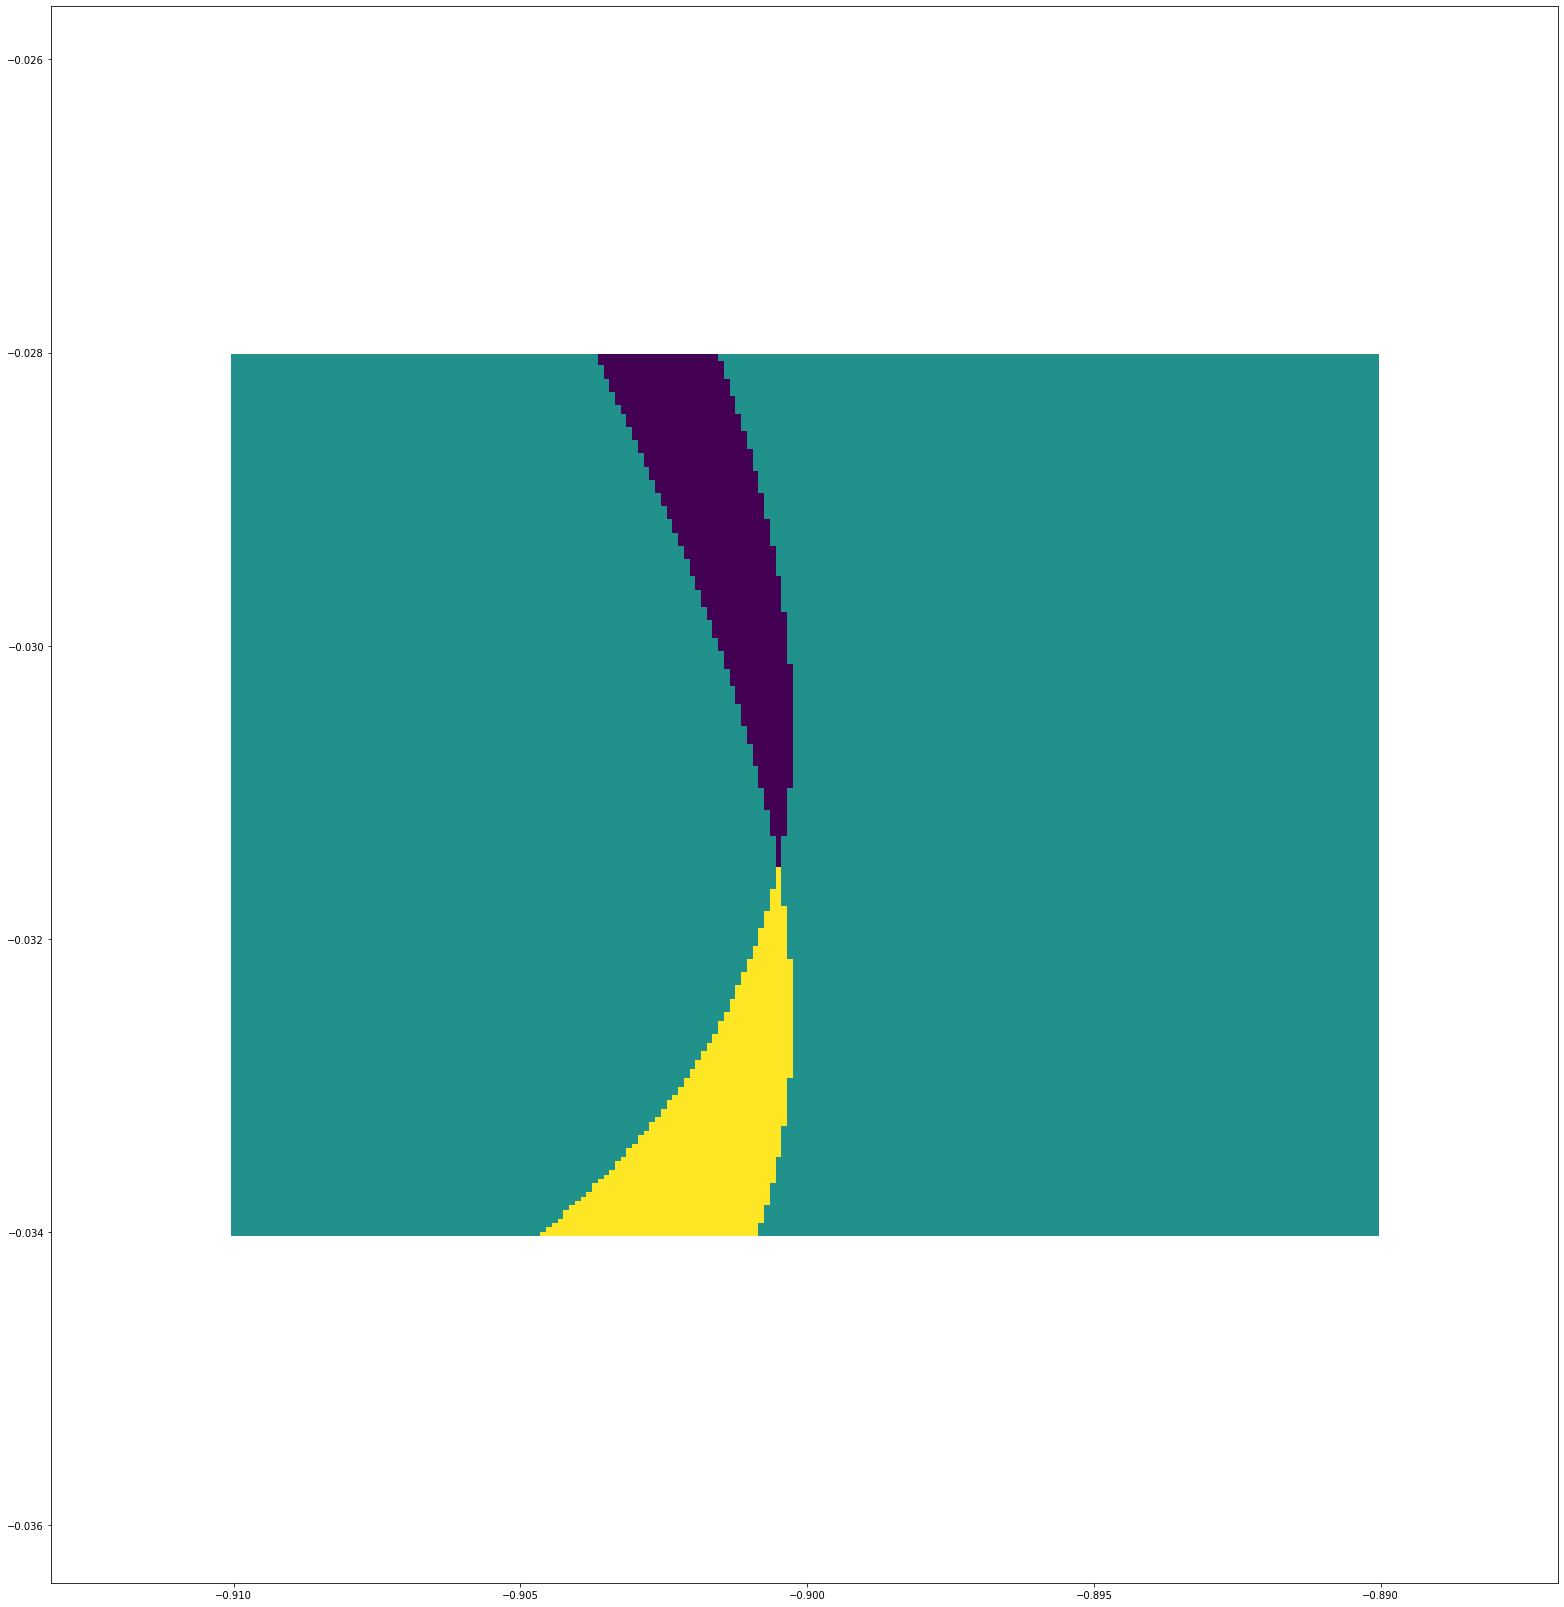

In [20]:
fig, ax = plt.subplots(figsize=(27,29))
ax.scatter(xar, yar, c=resar, marker=',')

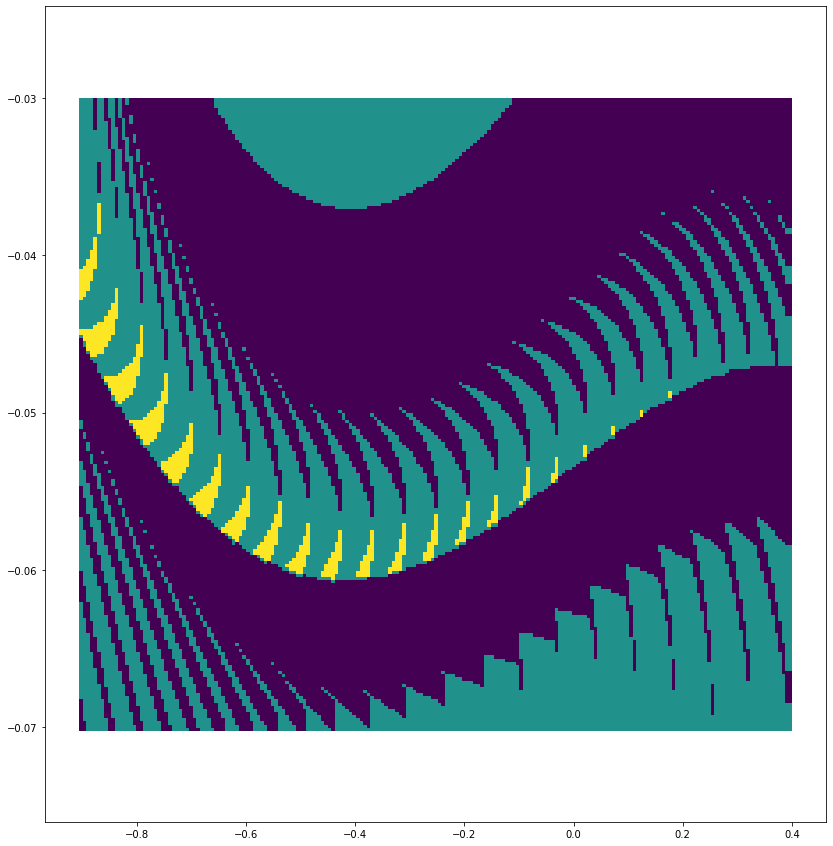

In [58]:
fig, ax = plt.subplots(figsize=(14,15))
ax.scatter(xar, yar, c=resar, marker=',')

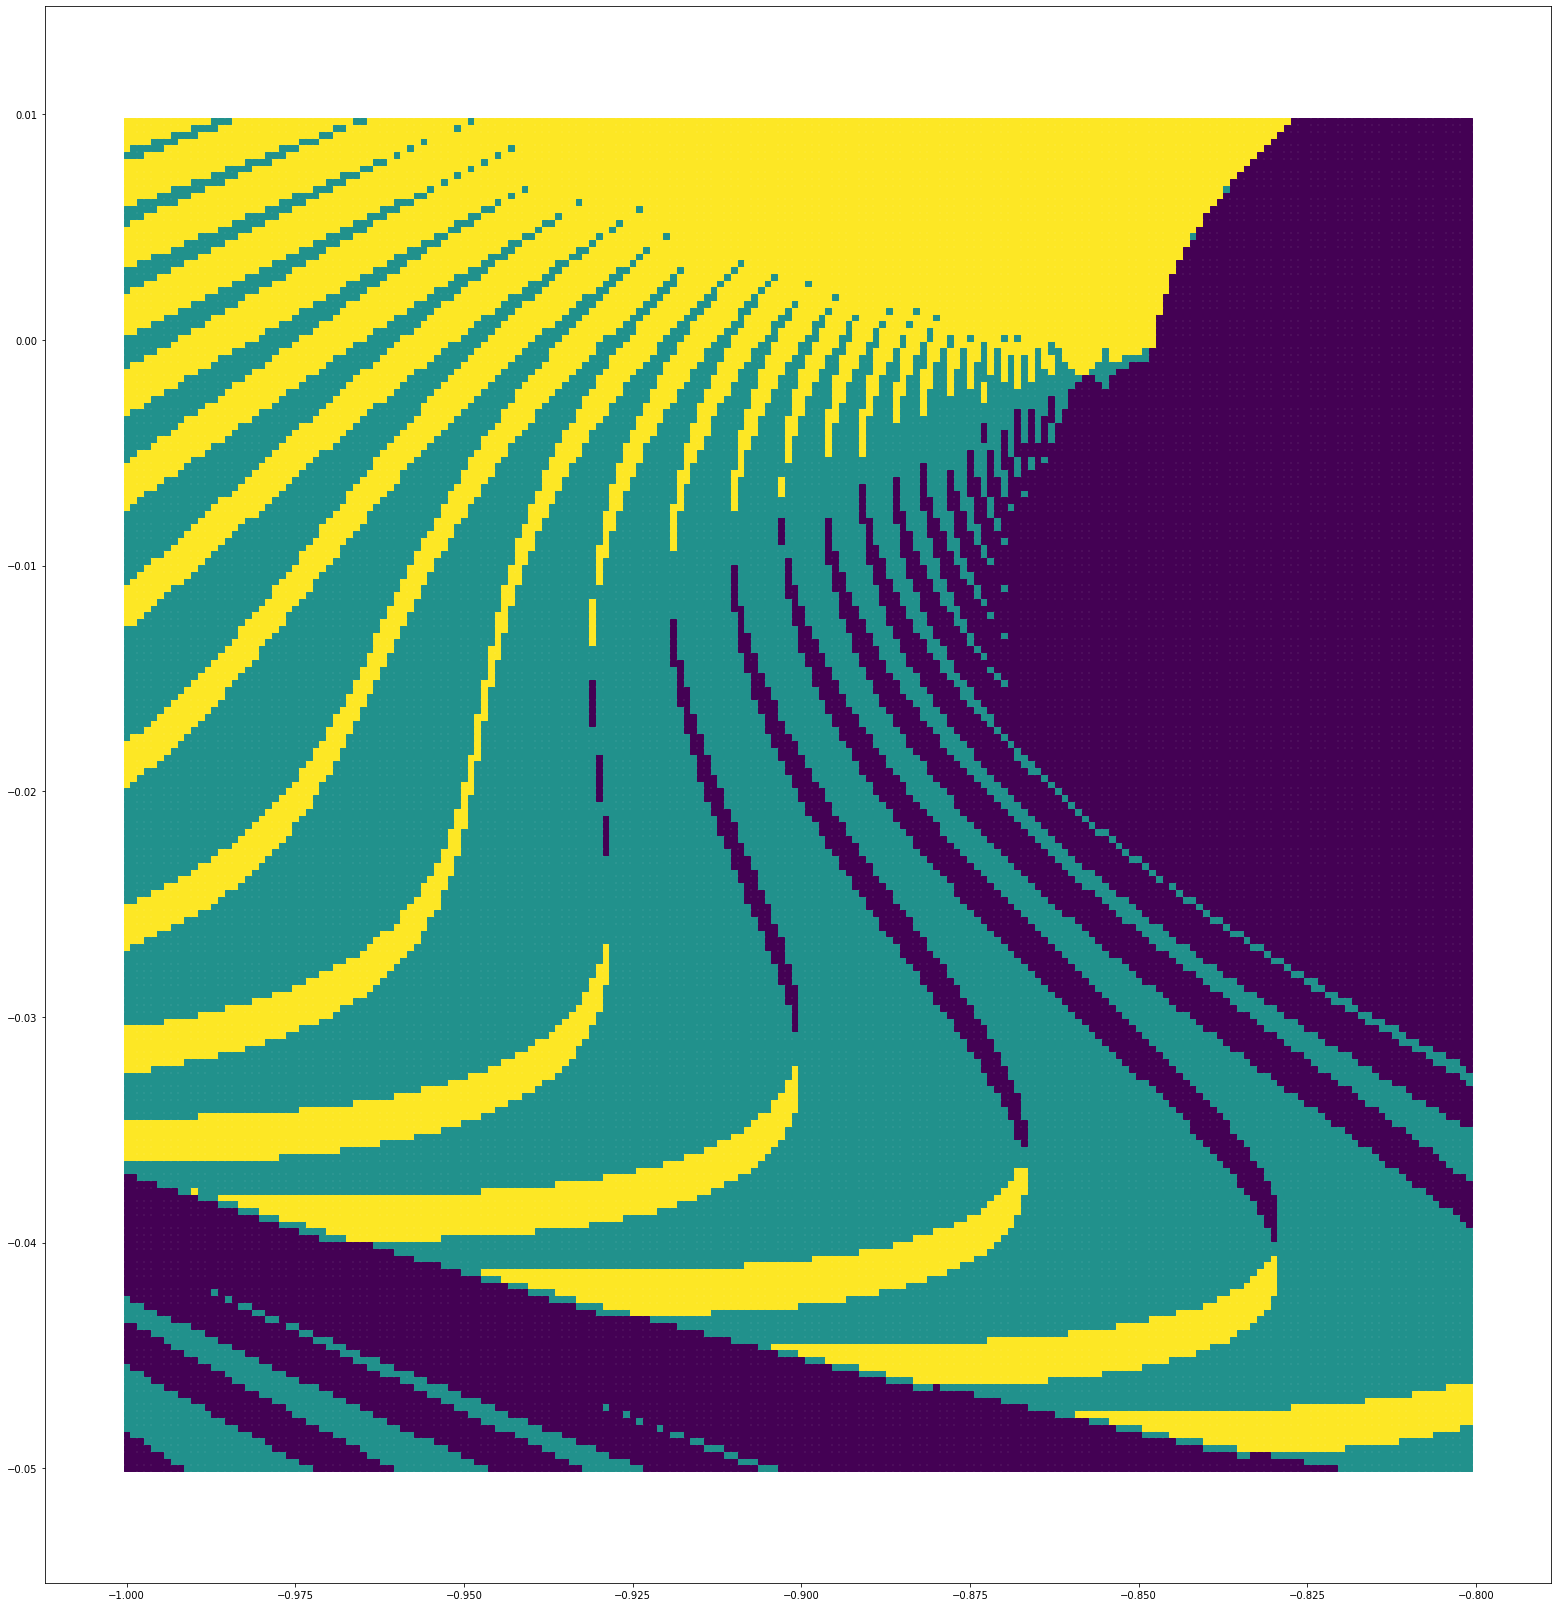

In [17]:
fig, ax = plt.subplots(figsize=(27,29))
ax.scatter(xar, yar, c=resar, marker=',')

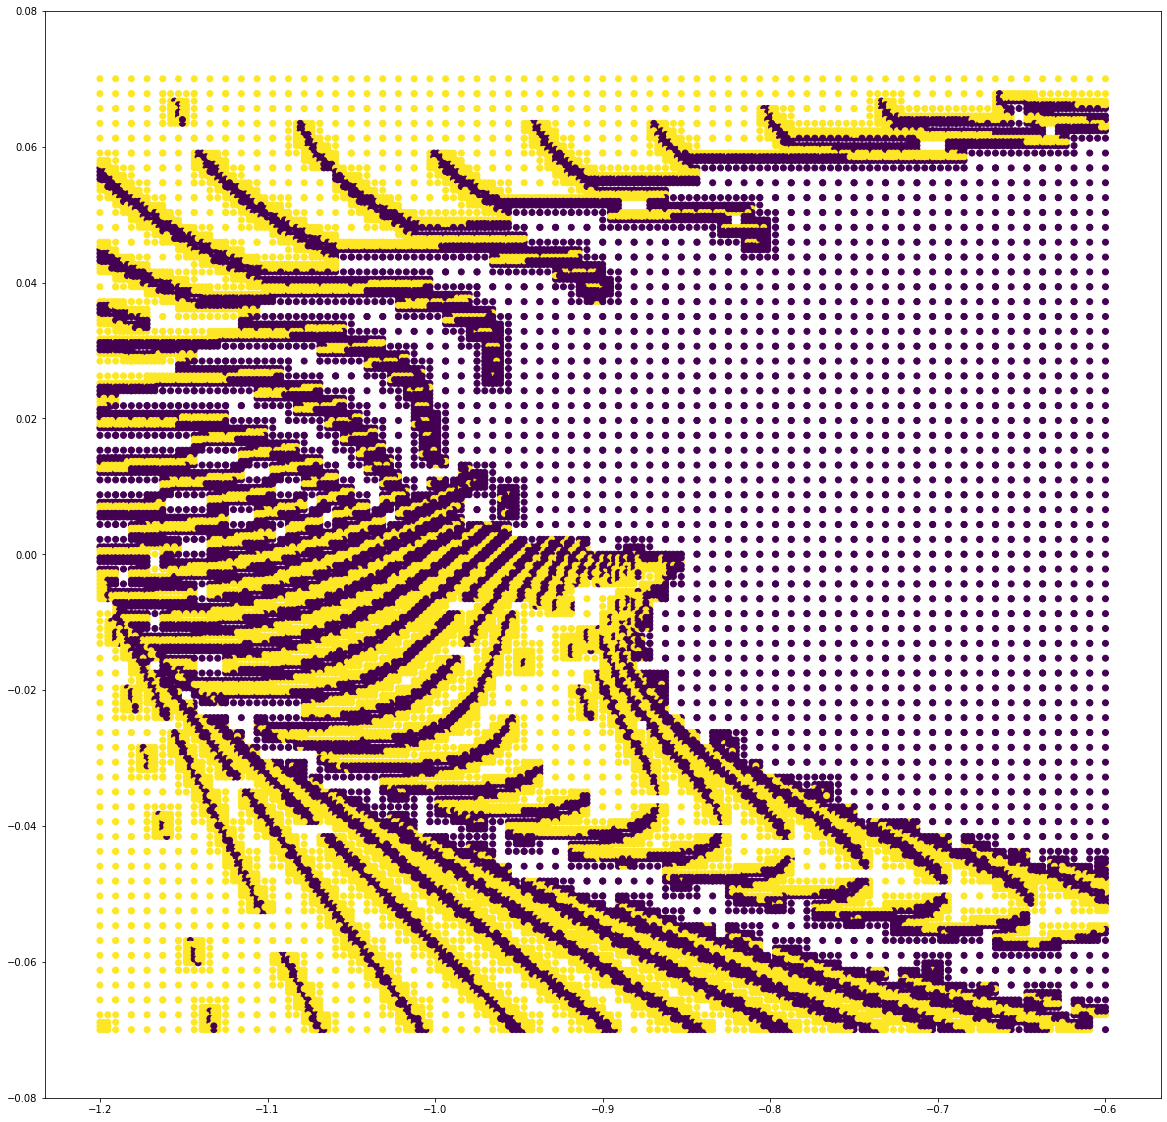

In [158]:
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(xar, yar, c=resar)
#ax.scatter(xar1, yar1, c=resar1)
#ax.set_xlim([0.25,0.5])
#ax.set_ylim([-0.02,0.02])

In [59]:
len(xar)

40000

In [53]:
env.reset()

array([-0.5125792,  0.       ])

In [62]:
env.close()

In [8]:
env.min_position

-1.2

In [22]:
probe(0, 0)

False

In [27]:
allequal(True, True, True)

True

In [84]:
tree1.get([-.849,0])

True

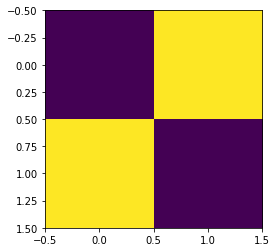

In [177]:
%matplotlib inline
plt.imshow(np.array([[0,1],[1,0]]))

In [178]:
from PIL import Image

In [179]:
Image.new('L',(10,10))